In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\Frank\Desktop\Proyectos Linkedin\Python Proyectos\Redes Neuronales\Perceptrón Multicapa (MLP)\Clasificación Binaria\Dia 35\plant_growth_data.csv')
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [3]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 193
Total de variables disponibles (columnas) = 7 
Columnas que cuentan con un valor nulo -
Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


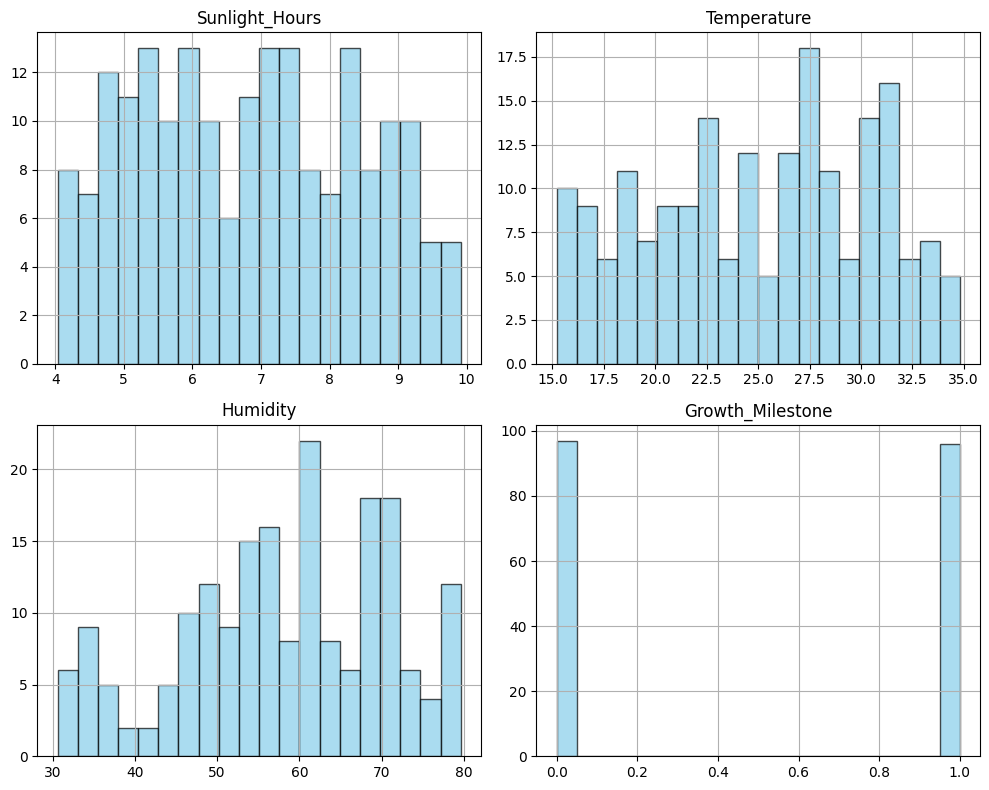

In [5]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Sunlight_Hours')
axes[0, 1].set_title('Temperature')
axes[1, 0].set_title('Humidity')
axes[1, 1].set_title('Growth_Milestone')

# Asegurarse de que los títulos se muestren correctamente
plt.tight_layout()
plt.show()

In [6]:
df2['Soil_Type'].value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [7]:
df2['Water_Frequency'].value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [8]:
df2['Fertilizer_Type'].value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [9]:
# Definir características numéricas y categóricas

numeric_features = ['Sunlight_Hours','Temperature','Humidity']
categorical_features = ['Soil_Type','Water_Frequency','Fertilizer_Type']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [11]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [12]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2, encoded_cats_df], axis=1)

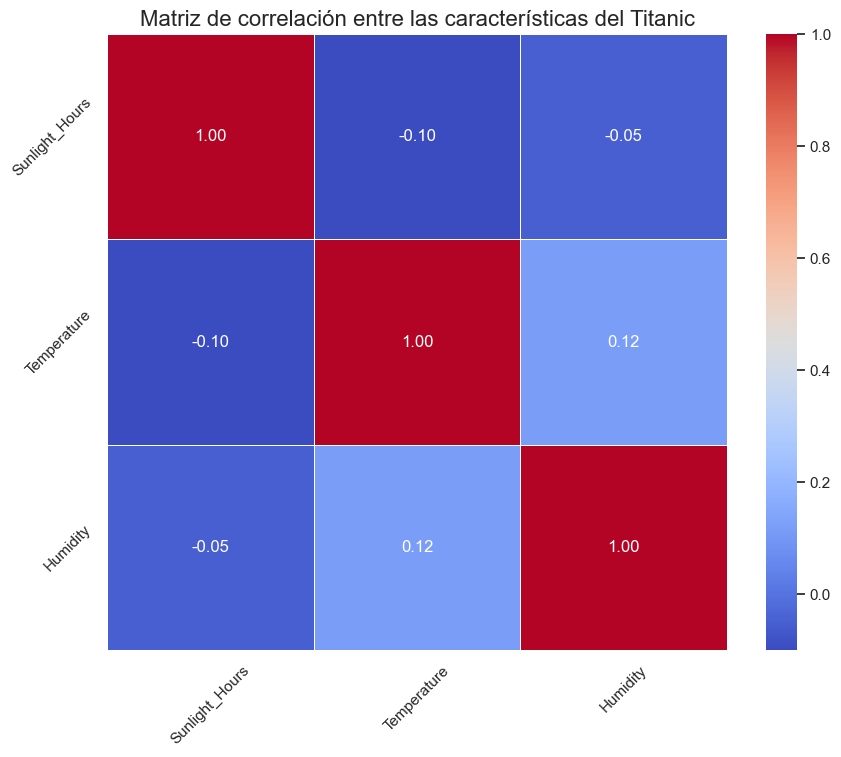

In [13]:
# Seleccionar las columnas para la matriz de correlación
columns_corr = ['Sunlight_Hours','Temperature','Humidity']
matriz_corr = df2[columns_corr].corr()  # Calcula la correlación entre las columnas seleccionadas

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Establecer el estilo de Seaborn
sns.set(style='white')

# Generar el mapa de calor para la matriz de correlación
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título y ajustes finales
plt.title('Matriz de correlación entre las características del Titanic', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [14]:
df2.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,loam,-1.024340,bi-weekly,chemical,1.244039,0.277238,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,sandy,-1.750923,weekly,organic,0.719700,-0.450562,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,loam,1.295184,bi-weekly,none,-0.355230,-1.066621,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,loam,0.886734,bi-weekly,none,-1.237800,-0.925920,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,sandy,0.970038,bi-weekly,organic,-1.300933,0.438684,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Soil_Type                  193 non-null    object 
 1   Sunlight_Hours             193 non-null    float64
 2   Water_Frequency            193 non-null    object 
 3   Fertilizer_Type            193 non-null    object 
 4   Temperature                193 non-null    float64
 5   Humidity                   193 non-null    float64
 6   Growth_Milestone           193 non-null    int64  
 7   Soil_Type_clay             193 non-null    float64
 8   Soil_Type_loam             193 non-null    float64
 9   Soil_Type_sandy            193 non-null    float64
 10  Water_Frequency_bi-weekly  193 non-null    float64
 11  Water_Frequency_daily      193 non-null    float64
 12  Water_Frequency_weekly     193 non-null    float64
 13  Fertilizer_Type_chemical   193 non-null    float64

In [16]:
# Definir X e Y

X = df2.drop(columns=['Soil_Type','Water_Frequency','Fertilizer_Type'])
y = df2['Growth_Milestone']

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
def build_modelo(): 
    oculta = tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X.shape[1]])
    dropout = tf.keras.layers.Dropout(0.3)
    oculta1 = tf.keras.layers.Dense(units=32, activation='relu')
    dropout1 = tf.keras.layers.Dropout(0.3)
    oculta2 = tf.keras.layers.Dense(units=30, activation='relu')
    dropout2 = tf.keras.layers.Dropout(0.3)
    salida = tf.keras.layers.Dense(units=1, activation='sigmoid')
    modelo = tf.keras.Sequential([oculta, dropout, oculta1, dropout1, oculta2, dropout2, salida])
    modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return modelo

In [19]:
modelo = build_model()

NameError: name 'build_model' is not defined

In [ ]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [ ]:
# Entrenar modelo
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=300,batch_size=64,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


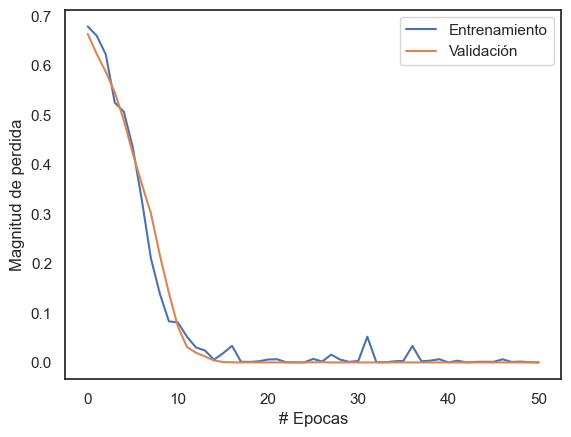

In [ ]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [35]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

# Crear el KerasClassifier
keras_model = KerasClassifier(model=build_modelo, epochs=100, batch_size=10, verbose=0)


ModuleNotFoundError: No module named 'scikeras'

In [32]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(keras_model, X, y, cv=5)

NameError: name 'keras_model' is not defined